<a href="https://colab.research.google.com/github/SakshamBansal12/CourseTalk/blob/main/LSTM_SingleUserOut_Tstep_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
from numpy import mean
from numpy import std
from numpy import dstack
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from matplotlib import pyplot
from numpy import array
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from pandas import concat
warnings.filterwarnings('ignore')

In [5]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	# Frame a time series as a supervised learning dataset.
	# Arguments:
	# 	data: Sequence of observations as a list or NumPy array.
	# 	n_in: Number of lag observations as input (X).
	# 	n_out: Number of observations as output (y).
	# 	dropnan: Boolean whether or not to drop rows with NaN values.
	# Returns:
	# 	Pandas DataFrame of series framed for supervised learning.
	n_vars = 1
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('old_emotion%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('old_emotion%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('old_emotion%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [6]:
accuracy=[]
fscore=[]
for i in range(0,33):
  df = pd.DataFrame()
  if(i<10):df1 = pd.read_csv("U0"+str(i)+"_self_report.csv")
  if(i>9):df1 = pd.read_csv("U"+str(i)+"_self_report.csv")
  for j in range(33):
      if (j != i):
          df = pd.concat([df,df1], axis=0, ignore_index = True)
      else:
          y = df1
 
  df = df.drop('elapsed_time',axis = 1)
  df = df.drop('weeknd_flag',axis = 1)
  df = df.drop('tod',axis = 1)
  df= df[0:len(df)]

  for k in range(0,len(df['current_emotion'])):
      if(df['current_emotion'][k]==2): df['current_emotion'][k]='happy'
      if(df['current_emotion'][k]==1): df['current_emotion'][k]='stressed'
      if(df['current_emotion'][k]==-2): df['current_emotion'][k]='sad'
      if(df['current_emotion'][k]==0): df['current_emotion'][k]='relaxed'
  for j in range(0,len(df['old_emotion'])):
      if(df['old_emotion'][j]==2): df['old_emotion'][j]='happy'
      if(df['old_emotion'][j]==1): df['old_emotion'][j]='stressed'
      if(df['old_emotion'][j]==-2): df['old_emotion'][j]='sad'
      if(df['old_emotion'][j]==0): df['old_emotion'][j]='relaxed'
  
  values = df['old_emotion']
  data = series_to_supervised(values, 4)
  print(data)
  data=data.join(df['current_emotion'])
  print(data)
#One Hot encoding the current emotion and old emotion
  old_emotion_hot_encoded4=pd.get_dummies(data['old_emotion1(t-4)'],prefix='old_emotion1(t-4)_')
  data = data.drop('old_emotion1(t-4)',axis = 1)
# Join the encoded df
  data = data.join(old_emotion_hot_encoded4)
  old_emotion_hot_encoded3=pd.get_dummies(data['old_emotion1(t-3)'],prefix='old_emotion1(t-3)_')
  data = data.drop('old_emotion1(t-3)',axis = 1)
# Join the encoded df
  data = data.join(old_emotion_hot_encoded3)
  old_emotion_hot_encoded2=pd.get_dummies(data['old_emotion1(t-2)'],prefix='old_emotion1(t-2)_')
  data = data.drop('old_emotion1(t-2)',axis = 1)
# Join the encoded df
  data = data.join(old_emotion_hot_encoded2)
  old_emotion_hot_encoded1=pd.get_dummies(data['old_emotion1(t-1)'],prefix='old_emotion1(t-1)_')
  data = data.drop('old_emotion1(t-1)',axis = 1)
# Join the encoded df
  data = data.join(old_emotion_hot_encoded1)
  old_emotion_hot_encoded0=pd.get_dummies(data['old_emotion1(t)'],prefix='old_emotion1(t)_')
  data = data.drop('old_emotion1(t)',axis = 1)
# Join the encoded df
  data = data.join(old_emotion_hot_encoded0)
  current_emotion_hot_encoded=pd.get_dummies(data['current_emotion'], prefix='current_emotion')
  data = data.drop('current_emotion',axis = 1)
# Join the encoded df
  data = data.join(current_emotion_hot_encoded)

  data['old_emotion1(t-4)']=data[['old_emotion1(t-4)__happy','old_emotion1(t-4)__relaxed','old_emotion1(t-4)__sad','old_emotion1(t-4)__stressed']].values.tolist()
  data['old_emotion1(t-4)']=np.array(data['old_emotion1(t-4)'])
  data = data.drop(['old_emotion1(t-4)__happy','old_emotion1(t-4)__sad','old_emotion1(t-4)__relaxed','old_emotion1(t-4)__stressed'],axis = 1)
  data['old_emotion1(t-3)']=data[['old_emotion1(t-3)__happy','old_emotion1(t-3)__relaxed','old_emotion1(t-3)__sad','old_emotion1(t-3)__stressed']].values.tolist()
  data['old_emotion1(t-3)']=np.array(data['old_emotion1(t-3)'])
  data = data.drop(['old_emotion1(t-3)__happy','old_emotion1(t-3)__sad','old_emotion1(t-3)__relaxed','old_emotion1(t-3)__stressed'],axis = 1)
  data['old_emotion1(t-2)'] = data[['old_emotion1(t-2)__happy','old_emotion1(t-2)__relaxed','old_emotion1(t-2)__sad','old_emotion1(t-2)__stressed']].values.tolist()
  data['old_emotion1(t-2)']=np.array(data['old_emotion1(t-2)'])
  data = data.drop(['old_emotion1(t-2)__happy','old_emotion1(t-2)__sad','old_emotion1(t-2)__relaxed','old_emotion1(t-2)__stressed'],axis = 1)
  data['old_emotion1(t-1)'] = data[['old_emotion1(t-1)__happy','old_emotion1(t-1)__relaxed','old_emotion1(t-1)__sad','old_emotion1(t-1)__stressed']].values.tolist()
  data['old_emotion1(t-1)']=np.array(data['old_emotion1(t-1)'])
  data = data.drop(['old_emotion1(t-1)__happy','old_emotion1(t-1)__sad','old_emotion1(t-1)__relaxed','old_emotion1(t-1)__stressed'],axis = 1)
  data['old_emotion1(t)'] = data[['old_emotion1(t)__happy','old_emotion1(t)__relaxed','old_emotion1(t)__sad','old_emotion1(t)__stressed']].values.tolist()
  data['old_emotion1(t)']=np.array(data['old_emotion1(t)'])
  data = data.drop(['old_emotion1(t)__happy','old_emotion1(t)__sad','old_emotion1(t)__relaxed','old_emotion1(t)__stressed'],axis = 1)
  data['current_emotion'] = data[['current_emotion_happy','current_emotion_relaxed','current_emotion_sad','current_emotion_stressed']].values.tolist()
  data = data.drop(['current_emotion_happy','current_emotion_relaxed','current_emotion_sad','current_emotion_stressed'],axis = 1)
  data['current_emotion']=np.array(data['current_emotion'])
  data['old_emotion'] = data[['old_emotion1(t-3)','old_emotion1(t-2)','old_emotion1(t-1)','old_emotion1(t)']].values.tolist()
  data = data.drop(['old_emotion1(t-3)','old_emotion1(t-2)','old_emotion1(t-1)','old_emotion1(t)'],axis = 1)

  trainX = data['old_emotion']
  trainX = np.array(trainX.tolist())
  trainy = data['current_emotion']
  trainy = np.array(trainy.tolist())


  y = y.drop('elapsed_time',axis = 1)
  y = y.drop('weeknd_flag',axis = 1)
  y = y.drop('tod',axis = 1)
  y= y[0:len(y)]
  print(y)
  
  for x in range(0,len(y['current_emotion'])):
      if(y['current_emotion'][x]==2): y['current_emotion'][x]='happy'
      if(y['current_emotion'][x]==1): y['current_emotion'][x]='stressed'
      if(y['current_emotion'][x]==-2): y['current_emotion'][x]='sad'
      if(y['current_emotion'][x]==0): y['current_emotion'][x]='relaxed'
  for s in range(0,len(y['old_emotion'])):
      if(y['old_emotion'][s]==2): y['old_emotion'][s]='happy'
      if(y['old_emotion'][s]==1): y['old_emotion'][s]='stressed'
      if(y['old_emotion'][s]==-2): y['old_emotion'][s]='sad'
      if(y['old_emotion'][s]==0): y['old_emotion'][s]='relaxed'

  values = y['old_emotion']
  dat1 = series_to_supervised(values, 4)
  dat1=dat1.join(y['current_emotion'])
  print(dat1)

  old_emotion_hot_encoded4=pd.get_dummies(dat1['old_emotion1(t-4)'],prefix='old_emotion1(t-4)_')
  dat1 = dat1.drop('old_emotion1(t-4)',axis = 1)
# Join the encoded df
  dat1 = dat1.join(old_emotion_hot_encoded4)
#One Hot encoding the current emotion and old emotion
  old_emotion_hot_encoded3=pd.get_dummies(dat1['old_emotion1(t-3)'],prefix='old_emotion1(t-3)_')
  dat1 = dat1.drop('old_emotion1(t-3)',axis = 1)
# Join the encoded df
  dat1 = dat1.join(old_emotion_hot_encoded3)
  old_emotion_hot_encoded2=pd.get_dummies(dat1['old_emotion1(t-2)'],prefix='old_emotion1(t-2)_')
  dat1 = dat1.drop('old_emotion1(t-2)',axis = 1)
# Join the encoded df
  dat1 = dat1.join(old_emotion_hot_encoded2)
  old_emotion_hot_encoded1=pd.get_dummies(dat1['old_emotion1(t-1)'],prefix='old_emotion1(t-1)_')
  dat1 = dat1.drop('old_emotion1(t-1)',axis = 1)
# Join the encoded df
  dat1 = dat1.join(old_emotion_hot_encoded1)
  old_emotion_hot_encoded0=pd.get_dummies(dat1['old_emotion1(t)'],prefix='old_emotion1(t)_')
  dat1 = dat1.drop('old_emotion1(t)',axis = 1)
# Join the encoded df
  dat1 = dat1.join(old_emotion_hot_encoded0)
  current_emotion_hot_encoded=pd.get_dummies(dat1['current_emotion'], prefix='current_emotion')
  dat1 = dat1.drop('current_emotion',axis = 1)
  print(dat1)

  
# Join the encoded df
  dat1 = dat1.join(current_emotion_hot_encoded)

  dat1['old_emotion1(t-4)']=dat1[['old_emotion1(t-4)__happy','old_emotion1(t-4)__relaxed','old_emotion1(t-4)__sad','old_emotion1(t-4)__stressed']].values.tolist()
  dat1['old_emotion1(t-4)']=np.array(dat1['old_emotion1(t-4)'])
  dat1 = dat1.drop(['old_emotion1(t-4)__happy','old_emotion1(t-4)__sad','old_emotion1(t-4)__relaxed','old_emotion1(t-4)__stressed'],axis = 1)
  dat1['old_emotion1(t-3)']=dat1[['old_emotion1(t-3)__happy','old_emotion1(t-3)__relaxed','old_emotion1(t-3)__sad','old_emotion1(t-3)__stressed']].values.tolist()
  dat1['old_emotion1(t-3)']=np.array(dat1['old_emotion1(t-3)'])
  dat1 = dat1.drop(['old_emotion1(t-3)__happy','old_emotion1(t-3)__sad','old_emotion1(t-3)__relaxed','old_emotion1(t-3)__stressed'],axis = 1)
  dat1['old_emotion1(t-2)'] = dat1[['old_emotion1(t-2)__happy','old_emotion1(t-2)__relaxed','old_emotion1(t-2)__sad','old_emotion1(t-2)__stressed']].values.tolist()
  dat1['old_emotion1(t-2)']=np.array(dat1['old_emotion1(t-2)'])
  dat1 = dat1.drop(['old_emotion1(t-2)__happy','old_emotion1(t-2)__sad','old_emotion1(t-2)__relaxed','old_emotion1(t-2)__stressed'],axis = 1)
  dat1['old_emotion1(t-1)'] = dat1[['old_emotion1(t-1)__happy','old_emotion1(t-1)__relaxed','old_emotion1(t-1)__sad','old_emotion1(t-1)__stressed']].values.tolist()
  dat1['old_emotion1(t-1)']=np.array(dat1['old_emotion1(t-1)'])
  dat1 = dat1.drop(['old_emotion1(t-1)__happy','old_emotion1(t-1)__sad','old_emotion1(t-1)__relaxed','old_emotion1(t-1)__stressed'],axis = 1)
  dat1['old_emotion1(t)'] = dat1[['old_emotion1(t)__happy','old_emotion1(t)__relaxed','old_emotion1(t)__sad','old_emotion1(t)__stressed']].values.tolist()
  dat1['old_emotion1(t)']=np.array(dat1['old_emotion1(t)'])
  dat1 = dat1.drop(['old_emotion1(t)__happy','old_emotion1(t)__sad','old_emotion1(t)__relaxed','old_emotion1(t)__stressed'],axis = 1)
  dat1['current_emotion'] = dat1[['current_emotion_happy','current_emotion_relaxed','current_emotion_sad','current_emotion_stressed']].values.tolist()
  dat1 = dat1.drop(['current_emotion_happy','current_emotion_relaxed','current_emotion_sad','current_emotion_stressed'],axis = 1)
  dat1['current_emotion']=np.array(dat1['current_emotion'])
  dat1['old_emotion'] = dat1[['old_emotion1(t-3)','old_emotion1(t-2)','old_emotion1(t-1)','old_emotion1(t)']].values.tolist()
  dat1 = dat1.drop(['old_emotion1(t-3)','old_emotion1(t-2)','old_emotion1(t-1)','old_emotion1(t)'],axis = 1)
 

# #   trainX,testX,trainy,testy = train_test_split(X, y, test_size = 0.25,shuffle=False)

  testX=dat1['old_emotion']
  testy=dat1['current_emotion']
  testX = np.array(testX.tolist())
  testy = np.array(testy.tolist())
   #   print(trainX)
   #   print(trainX.shape)
   #   print(trainy.shape)
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  print(n_timesteps, n_features, n_outputs)
  verbose, epochs, batch_size = 0, 32, 32
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  model = Sequential()
  model.add(LSTM(50, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit network
  model.summary
  model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size)
  model.history
  y_predict=model.predict(testX)
  # summarize scores
# evaluate model
  _,accur=model.evaluate(testX, testy, batch_size=batch_size)
  fscore.append(f1_score(np.argmax(testy, axis=1),np.argmax(y_predict, axis=1), average='weighted'))
  accuracy.append(accur)  

260/260 [==============================] - 2s 8ms/step - loss: 0.4351 - accuracy: 0.8761
Epoch 15/32
260/260 [==============================] - 2s 7ms/step - loss: 0.4273 - accuracy: 0.8775
Epoch 16/32
260/260 [==============================] - 2s 8ms/step - loss: 0.4216 - accuracy: 0.8776
Epoch 17/32
260/260 [==============================] - 2s 8ms/step - loss: 0.4198 - accuracy: 0.8766
Epoch 18/32
260/260 [==============================] - 2s 8ms/step - loss: 0.4137 - accuracy: 0.8802
Epoch 19/32
260/260 [==============================] - 2s 7ms/step - loss: 0.4136 - accuracy: 0.8770
Epoch 20/32
260/260 [==============================] - 2s 8ms/step - loss: 0.4133 - accuracy: 0.8764
Epoch 21/32
260/260 [==============================] - 2s 8ms/step - loss: 0.4105 - accuracy: 0.8771
Epoch 22/32
260/260 [==============================] - 2s 7ms/step - loss: 0.4067 - accuracy: 0.8781
Epoch 23/32
260/260 [==============================] - 2s 7ms/step - loss: 0.4094 - accuracy: 0.8790
Ep

In [7]:
len(accuracy)

33

In [8]:
xpos = np.arange(33)
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

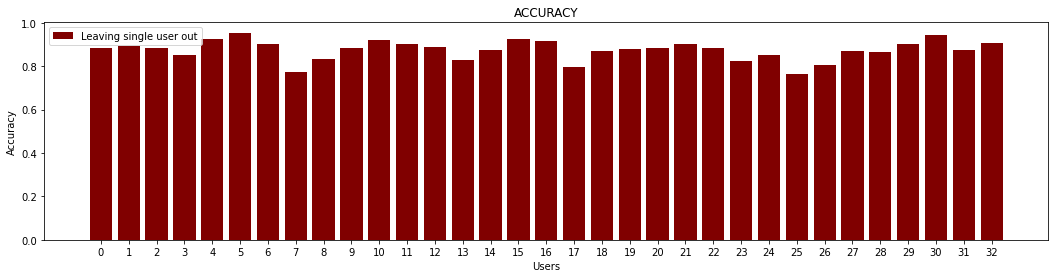

In [9]:
plt.figure(figsize=(18,4))
plt.xticks(xpos,range(0,33))
plt.bar(range(0,33), accuracy, color ='maroon',label = "Leaving single user out")
plt.ylabel("Accuracy")
plt.xlabel("Users")
plt.title("ACCURACY")
plt.legend()

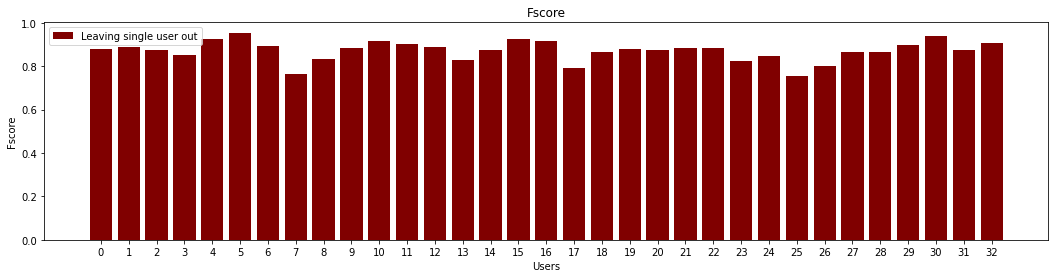

In [10]:
plt.figure(figsize=(18,4))
plt.xticks(xpos,range(0,33))
plt.bar(range(0,33), fscore, color ='maroon',label = "Leaving single user out")
plt.ylabel("Fscore")
plt.xlabel("Users")
plt.title("Fscore")
plt.legend()

In [11]:
import pandas as pd 
pd.DataFrame(fscore).to_csv("lstmfscore.csv", header=['Fscore'], index=None)

# su_acc = pd.read_csv("su_acc.csv")
# su_fs=pd.read_csv("su_fscore.csv")

In [12]:
# plt.figure(figsize=(18,4))
# plt.xticks(xpos,range(0,33))
# val=su_acc['Accuracy']
# plt.bar(xpos-0.15, val , width = 0.3,label = "80% train, 20% test", align='center')
# plt.bar(xpos+0.15, accuracy, width = 0.3, label = "Leave one user out",align='center')
# plt.ylabel("Accuracy")
# plt.xlabel("Users")
# plt.title("ACCURACY")
# plt.legend()

In [13]:
# plt.figure(figsize=(18,4))
# plt.xticks(xpos,range(0,33))
# f_val=su_fs['Fscore']
# plt.bar(xpos-0.15, f_val , width = 0.3,label = "80% train, 20% test", align='center')
# plt.bar(xpos+0.15, fscore, width = 0.3, label = "Leave one user out",align='center')
# plt.ylabel("Fscore")
# plt.xlabel("Users")
# plt.title("FSCORE")
# plt.legend()